In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score, mean_squared_error
import math

In [2]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [46]:
train = pd.read_csv('/content/traindata.csv')

In [47]:
train.head()

,Maximum,Minimum
0,33,24
1,30,22
2,35,24
3,33,22
4,34,24


In [48]:
max_training_data = train['Maximum']
min_training_data = train['Minimum']

In [49]:
max_training_data = np.array(max_training_data)
min_training_data = np.array(min_training_data)

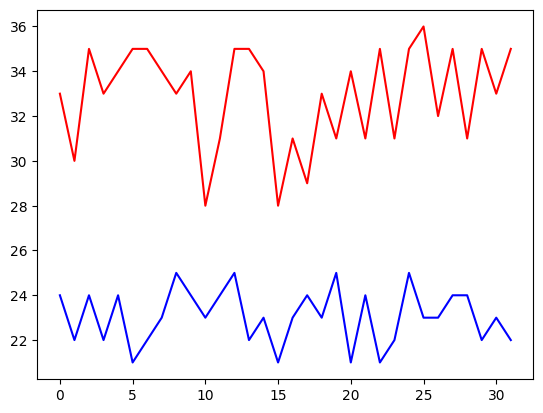

In [50]:
plt.plot(max_training_data, color='red')
plt.plot(min_training_data, color='blue')

In [51]:
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end = i + n_steps
        if end >= len(data):
            break
        X.append(data[i:end])
        y.append(data[end])
    return np.array(X), np.array(y)

In [52]:
n_steps = 5
X, y = prepare_data(max_training_data, n_steps)

In [53]:
print(X)

[[33 30 35 33 34]
 [30 35 33 34 35]
 [35 33 34 35 35]
 [33 34 35 35 34]
 [34 35 35 34 33]
 [35 35 34 33 34]
 [35 34 33 34 28]
 [34 33 34 28 31]
 [33 34 28 31 35]
 [34 28 31 35 35]
 [28 31 35 35 34]
 [31 35 35 34 28]
 [35 35 34 28 31]
 [35 34 28 31 29]
 [34 28 31 29 33]
 [28 31 29 33 31]
 [31 29 33 31 34]
 [29 33 31 34 31]
 [33 31 34 31 35]
 [31 34 31 35 31]
 [34 31 35 31 35]
 [31 35 31 35 36]
 [35 31 35 36 32]
 [31 35 36 32 35]
 [35 36 32 35 31]
 [36 32 35 31 35]
 [32 35 31 35 33]]


In [54]:
print(y)

[35 35 34 33 34 28 31 35 35 34 28 31 29 33 31 34 31 35 31 35 36 32 35 31
 35 33 35]


In [55]:
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [56]:
X.shape

(27, 5, 1)

In [57]:
model = Sequential()

In [58]:
model.add(LSTM(31, activation='relu', return_sequences = True, input_shape=(n_steps, n_features)))
model.add(LSTM(31, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1205.5718
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 1190.7047
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 1176.6433
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 1163.2623
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 1150.4351
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 1138.0377
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 1125.9681
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 1114.1085
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 1102.3308
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 1090.4978
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 1078.4666
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 1066.0591
Epoch 13/100
1/

In [59]:
x_input = np.array(pd.read_csv('/content/testdata.csv')['Maximum'][-n_steps:])
temp_input = list(x_input)
output = []
i = 0
while(i < n_steps):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        output.append(yhat[0][0])
        i+=1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        output.append(yhat[0][0])
        i+=1

output = [round(i) for i in output]

In [60]:
real_temperatures = [29, 31, 31, 31, 30]

([<matplotlib.axis.YTick at 0x7fef074596f0>,
 [Text(0, 15.0, '15.00'),
  Text(0, 21.25, '21.25'),
  Text(0, 27.5, '27.50'),
  Text(0, 33.75, '33.75'),
  Text(0, 40.0, '40.00')])

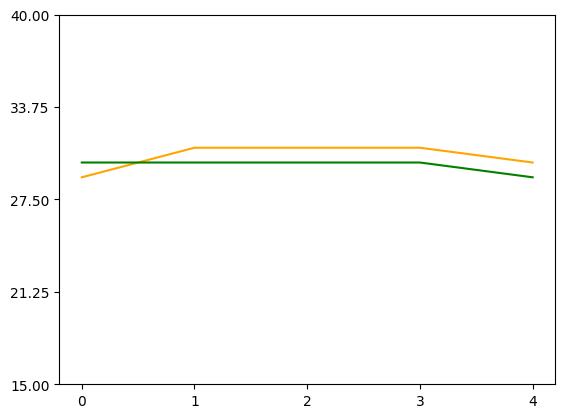

In [61]:
plt.plot(real_temperatures, color = 'orange')
plt.plot(output, color = 'green')
plt.xticks(list(range(5)))
plt.yticks(np.linspace(15, 40, 5))

In [79]:
def predictTemperatureMax():
    #Importing the required libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow import keras
    from keras.layers import LSTM, Dense, Flatten
    from keras.models import Sequential

    #Reading the data
    train = pd.read_csv('traindata.csv')
    n_steps = 5
    #Data Preprocessing
    max_training_data = train['Maximum']
    max_training_data = np.array(max_training_data)
    X, y = [], []
    for i in range(len(max_training_data)):
        end = i + n_steps
        if end >= len(max_training_data):
            break
        X.append(max_training_data[i:end])
        y.append(max_training_data[end])

    # Defining the feature vector and the output vector
    X, y = prepare_data(max_training_data, n_steps)
    n_features = 1

    # Reshape the Feature Matrix
    X = X.reshape(X.shape[0], X.shape[1], n_features)

    #Create the Model
    model = Sequential()
    model.add(LSTM(31, activation='relu', return_sequences = True, input_shape=(n_steps, n_features)))
    model.add(LSTM(31, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mse')

    #Fitting the Model
    model.fit(X, y, epochs=200, verbose=0)

    #Testing the Fitted weights
    x_input = np.array(pd.read_csv('/content/testdata.csv')['Maximum'][-n_steps:])
    temp_input = list(x_input)
    output = []
    i = 0
    while(i < n_steps):
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            temp_input = temp_input[1:]
            output.append(yhat[0][0])
            i+=1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            output.append(yhat[0][0])
            i+=1
    # print(output)

    #Defining the real temperatures for prediction test
    real_temperatures = [29, 32, 31, 31, 30]
    output = [round(i) for i in output]
    print(f'Predicted Values: {output}')
    print(f'Actual Values: {real_temperatures}')
    print(f'MSE: {mean_squared_error(real_temperatures, output)}')
    #Plot the Graph between Real Temperature and Predicted Temperature for the next n_steps days for visualization
    plt.plot(real_temperatures, color='red')
    plt.plot(output, color='blue')
    plt.xticks(list(range(n_steps)))
    plt.yticks(np.linspace(0, 40, 5))

Predicted Values: [30, 30, 30, 30, 29]
Actual Values: [29, 32, 31, 31, 30]
MSE: 1.6


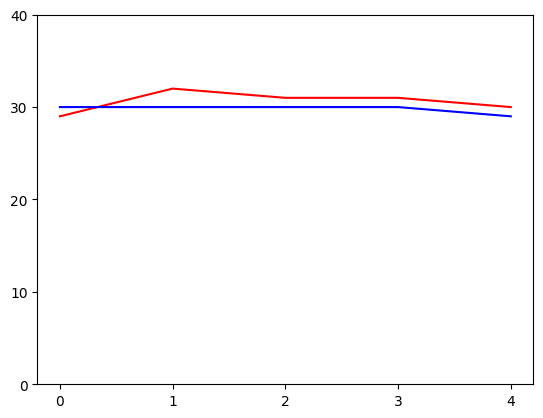

In [80]:
predictTemperatureMax()

In [81]:
def predictTemperatureMin():
    #Importing the required libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow import keras
    from keras.layers import LSTM, Dense, Flatten
    from keras.models import Sequential

    #Reading the data
    train = pd.read_csv('traindata.csv')
    n_steps = 5
    #Data Preprocessing
    max_training_data = train['Minimum']
    max_training_data = np.array(max_training_data)
    X, y = [], []
    for i in range(len(max_training_data)):
        end = i + n_steps
        if end >= len(max_training_data):
            break
        X.append(max_training_data[i:end])
        y.append(max_training_data[end])

    # Defining the feature vector and the output vector
    X, y = prepare_data(max_training_data, n_steps)
    n_features = 1

    # Reshape the Feature Matrix
    X = X.reshape(X.shape[0], X.shape[1], n_features)

    #Create the Model
    model = Sequential()
    model.add(LSTM(31, activation='relu', return_sequences = True, input_shape=(n_steps, n_features)))
    model.add(LSTM(31, activation='relu'))
    model.compile(optimizer = 'adam', loss = 'mse')

    #Fitting the Model
    model.fit(X, y, epochs=200, verbose=0)

    #Testing the Fitted weights
    x_input = np.array(pd.read_csv('/content/testdata.csv')['Minimum'][-n_steps:])
    temp_input = list(x_input)
    output = []
    i = 0
    while(i < n_steps):
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            temp_input = temp_input[1:]
            output.append(yhat[0][0])
            i+=1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            output.append(yhat[0][0])
            i+=1
    # print(output)

    #Defining the real temperatures for prediction test
    real_temperatures = [23, 23, 24, 22, 23]
    output = [round(i) for i in output]
    print(f'Predicted Values: {output}')
    print(f'Actual Values: {real_temperatures}')
    print(f'MSE: {mean_squared_error(real_temperatures, output)}')
    #Plot the Graph between Real Temperature and Predicted Temperature for the next n_steps days for visualization
    plt.plot(real_temperatures, color='red')
    plt.plot(output, color='blue')
    plt.xticks(list(range(n_steps)))
    plt.yticks(np.linspace(0, 40, 5))

Predicted Values: [23, 23, 23, 23, 23]
Actual Values: [23, 23, 24, 22, 23]
MSE: 0.4


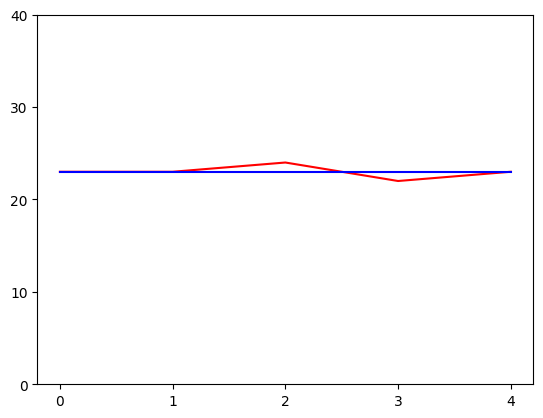

In [82]:
predictTemperatureMin()